# Fitting monotonic functions

Fitting a model that's a 1-d monotonic function. We could do this with MLE, but are starting with MCMC.

In [6]:
import pymc3 as pm
import numpy as np
from scipy import stats
#from scipy.special import logit
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

In [86]:
npts = 20
x = stats.uniform(0, 100).rvs(npts)
y = x - 60
y = 0.04*y*(y<0) + 0.20*y*(y>=0) + 0
y = logistic(y)


In [87]:
y

array([0.41741632, 0.31068937, 0.22343604, 0.11530802, 0.99779075,
       0.88715484, 0.36516762, 0.91847022, 0.90753848, 0.30798965,
       0.08689271, 0.08433312, 0.10672207, 0.4784796 , 0.99924189,
       0.16875188, 0.13715864, 0.60200362, 0.13874459, 0.99965673])

In [88]:
data = stats.bernoulli(y).rvs(npts)
data

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1])

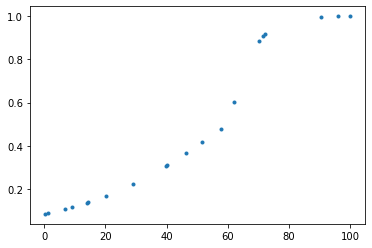

In [89]:
fig, ax = plt.subplots()
ax.plot(x, y, '.')

In [ ]:
pa = 0.2
pb = 0.4


In [ ]:
with pm.Model() as model:
    a = pm.Uniform(0, 1)
    b = pm.Uniform(0, 1)